In [157]:
#### Importing Liabraries
import pandas as pd
import datetime
import timer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix,precision_score,accuracy_score

In [158]:
#### Getting the data
def read_data():
    data = pd.read_csv("C:/Data Science/Dec 2023/5 dec 2023/Assignments/Health Insurance Prediction/Health Insurance Prediction/train.csv")
    return data

In [159]:
#### Calling the read data function
df = read_data()
print(df.head())

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0  


In [209]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [160]:
#### preprocessing and feature engineering
df1 = df.copy()
print(df1.head())
print(df1.info())
print(df1.shape)

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0  
<class '

In [161]:
df1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [162]:
df1['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [163]:
# c = []
# for i in ['Gender', 'Age', 'Driving_License', 'Region_Code',
#        'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
#        'Policy_Sales_Channel', 'Vintage', 'Response']:
#     count = df[i].value_counts()
#     print(count)
    
    

In [164]:
df1.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [165]:
print(df1.select_dtypes(include='number'))

            id  Age  Driving_License  Region_Code  Previously_Insured  \
0            1   44                1         28.0                   0   
1            2   76                1          3.0                   0   
2            3   47                1         28.0                   0   
3            4   21                1         11.0                   1   
4            5   29                1         41.0                   1   
...        ...  ...              ...          ...                 ...   
381104  381105   74                1         26.0                   1   
381105  381106   30                1         37.0                   1   
381106  381107   21                1         30.0                   1   
381107  381108   68                1         14.0                   0   
381108  381109   46                1         29.0                   0   

        Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0              40454.0                  26.0      217    

In [166]:
print(df1.select_dtypes(include='object'))

        Gender Vehicle_Age Vehicle_Damage
0         Male   > 2 Years            Yes
1         Male    1-2 Year             No
2         Male   > 2 Years            Yes
3         Male    < 1 Year             No
4       Female    < 1 Year             No
...        ...         ...            ...
381104    Male    1-2 Year             No
381105    Male    < 1 Year             No
381106    Male    < 1 Year             No
381107  Female   > 2 Years            Yes
381108    Male    1-2 Year             No

[381109 rows x 3 columns]


In [167]:
df1.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [168]:
df1.select_dtypes(include='number').columns

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

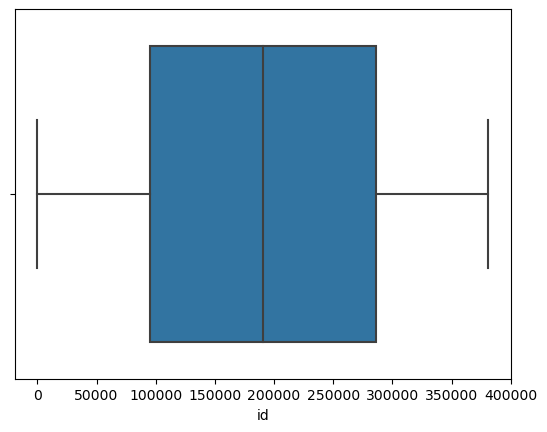

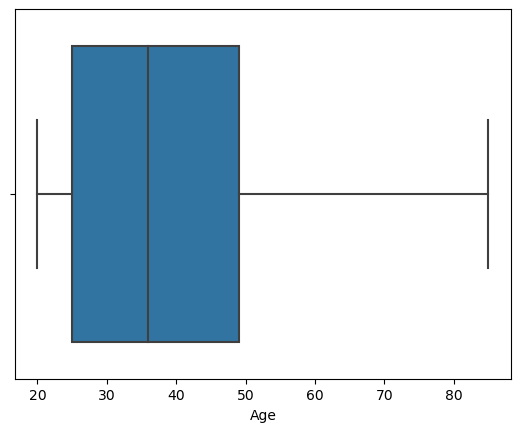

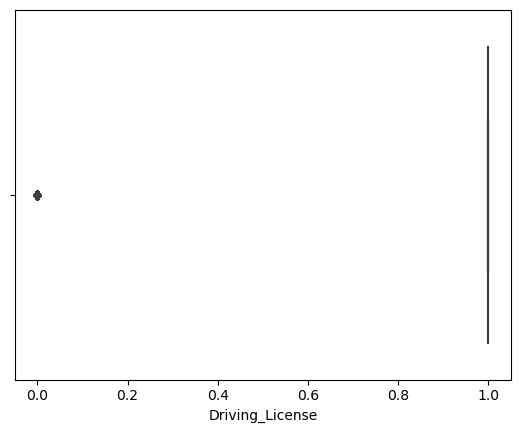

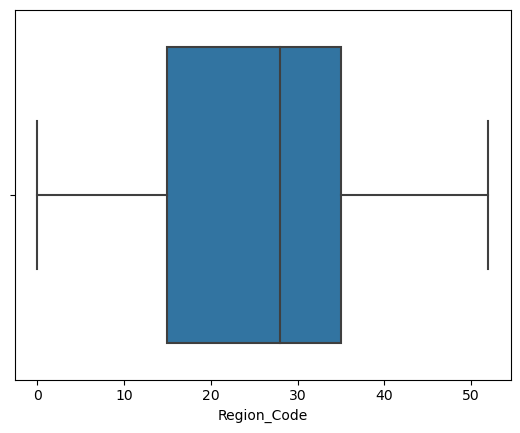

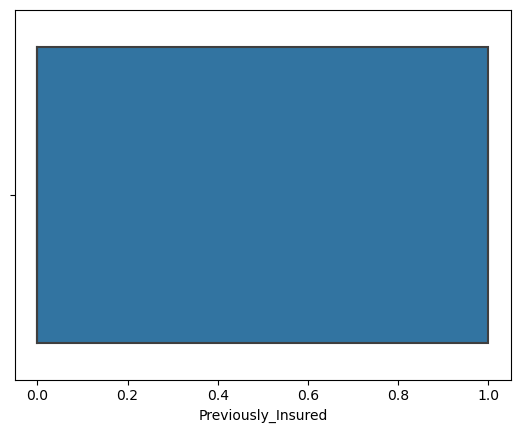

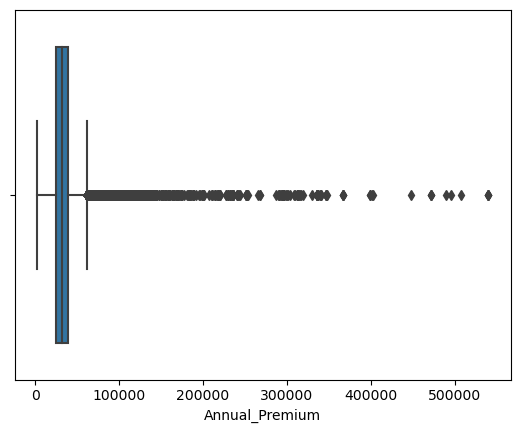

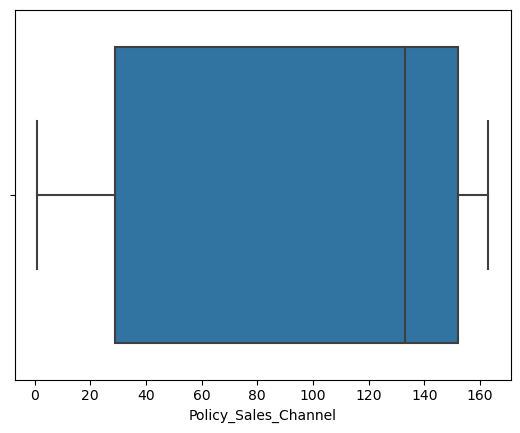

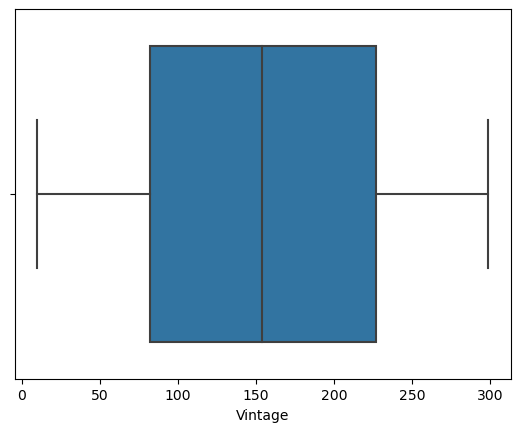

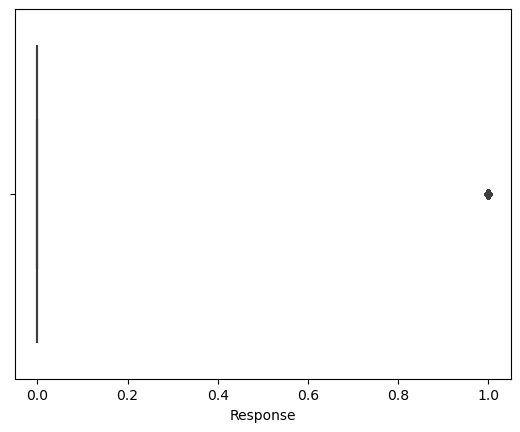

In [169]:
for i in ['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']:
    sns.boxplot(data = df1,x = i)
    plt.show()

In [170]:
df1[df1['Annual_Premium']<100000].count()

id                      380331
Gender                  380331
Age                     380331
Driving_License         380331
Region_Code             380331
Previously_Insured      380331
Vehicle_Age             380331
Vehicle_Damage          380331
Annual_Premium          380331
Policy_Sales_Channel    380331
Vintage                 380331
Response                380331
dtype: int64

In [171]:
col = ['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']

In [172]:
def wisker(col):
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q1 + 1.5 * IQR
    return lower,upper

In [173]:
for i in col:
    lower,upper = wisker(df1[i])
    df1[i] = np.where(df1[i]<lower,lower,df1[i])
    df1[i] = np.where(df1[i]>upper,upper,df1[i])

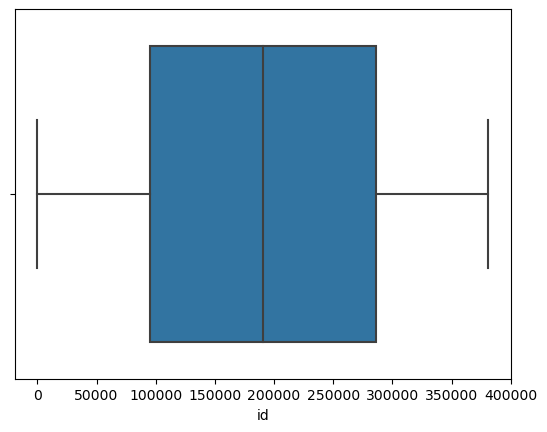

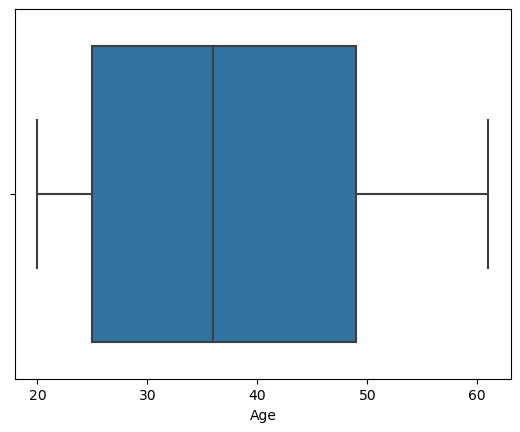

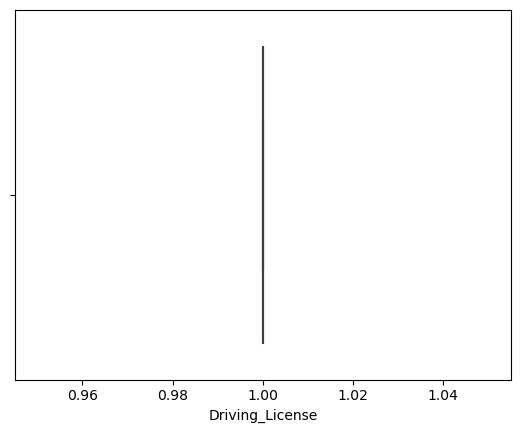

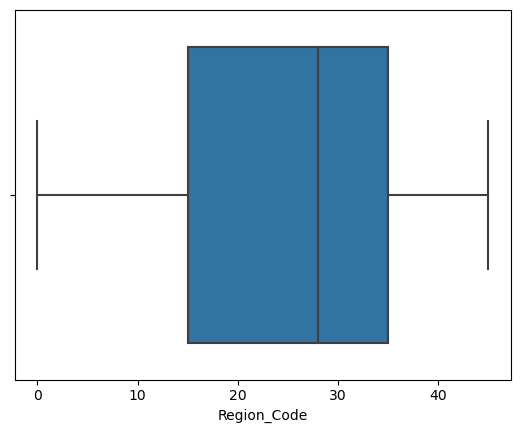

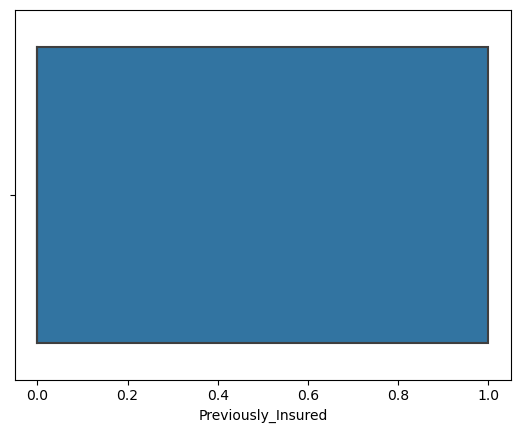

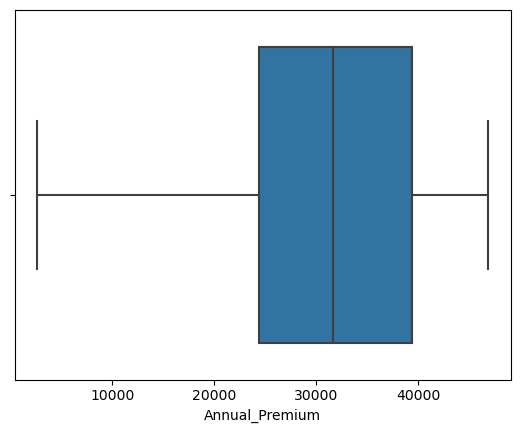

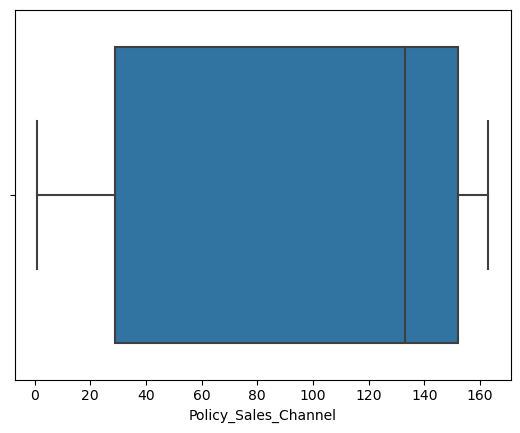

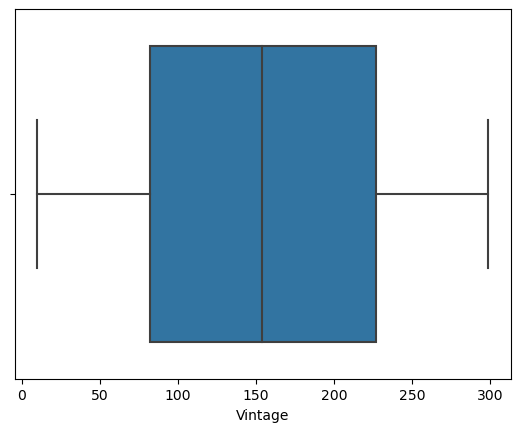

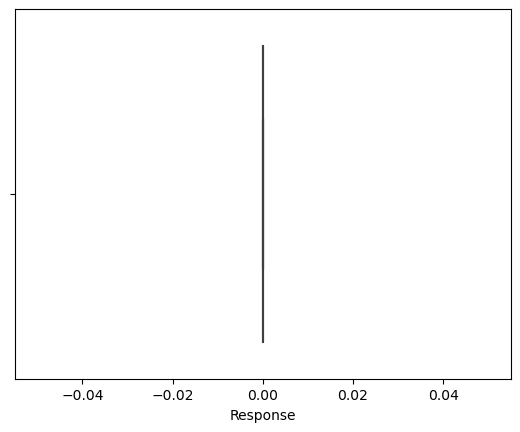

In [174]:
for i in ['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']:
    sns.boxplot(data = df1,x = i)
    plt.show()

In [175]:
col = df1.select_dtypes(include = 'number').columns
col

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [176]:
# col = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
#        'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']
# plt.figure(figsize=(15,4))
# for i in col:
#     sns.displot(data = df1,x = cols,kde=True)
# plt.show()

In [177]:
col1 = df1.select_dtypes(include = 'object').columns
col1

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [178]:
# plt.figure(figsize=(12,8))
# for i,cols in enumerate(col1,1):
#     plt.subplot(2,2,i)
#     sns.histplot(data = df1,x = cols)
    
# plt.tight_layout()    
# plt.show()

In [179]:
df1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [180]:
# df1 = pd.get_dummies(df1,drop_first=True)

In [181]:
df1.select_dtypes(include='object').columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [182]:
df1['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [183]:
df1['Gender'] = df1['Gender'].replace(('Male','Female'),(1,0))

In [184]:
df1['Vehicle_Age'] = df1['Vehicle_Age'].replace(('1-2 Year','< 1 Year','> 2 Years'),(0,1,2))

In [185]:
df1['Vehicle_Damage'] = df1['Vehicle_Damage'].replace(('Yes','No'),(1,0))

In [186]:
df1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [218]:
X = df1[['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']]
y = df['Response']

In [219]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=1234)

In [220]:
model = LinearRegression()
model_fit = model.fit(X_train,y_train)
pred = model_fit.predict(X_test)
pred

array([-0.02091191, -0.00774361, -0.01281245, ...,  0.23299592,
        0.17476814, -0.0118877 ])

In [229]:
df_pred = pd.DataFrame({'Actual_value':y_test,'Predicted_value':pred,'Differance':y_test-pred})
df_pred

,Actual_value,Predicted_value,Differance
327037,0,-0.020912,0.020912
38186,0,-0.007744,0.007744
80193,0,-0.012812,0.012812
15054,0,0.033507,-0.033507
282127,0,0.009853,-0.009853
...,...,...,...
27525,0,-0.024161,0.024161
347344,0,-0.018821,0.018821
250182,0,0.232996,-0.232996
223851,0,0.174768,-0.174768


In [226]:
# df_pred['Actual'] = y_test.values

In [228]:
print("The Strength of the model is -",r2_score(df_pred['Actual_value'],df_pred['Predicted_value']))

The Strength of the model is - 0.13814013731177022


In [193]:
r2_score(y_test,pred)

0.13814013731177022

In [194]:
df1.select_dtypes(include='number').columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [195]:
# for i in ['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
#        'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
#        'Gender_Male', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years',
#        'Vehicle_Damage_Yes']:
#     sns.regplot(data = df1,x = i,y = 'Response')
#     plt.show()

<Axes: xlabel='Age', ylabel='Response'>

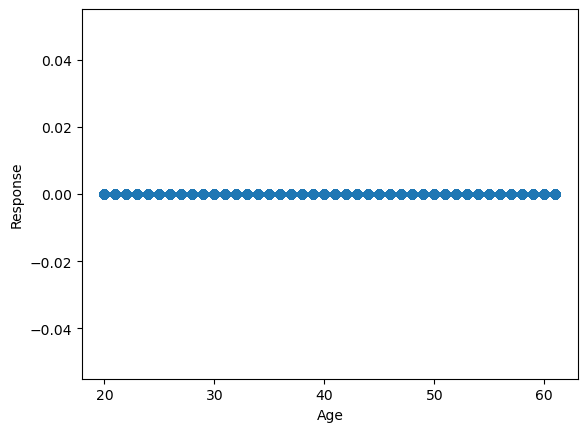

In [196]:
sns.regplot(data = df1,x = 'Age',y = 'Response')

<Axes: xlabel='Age', ylabel='Response'>

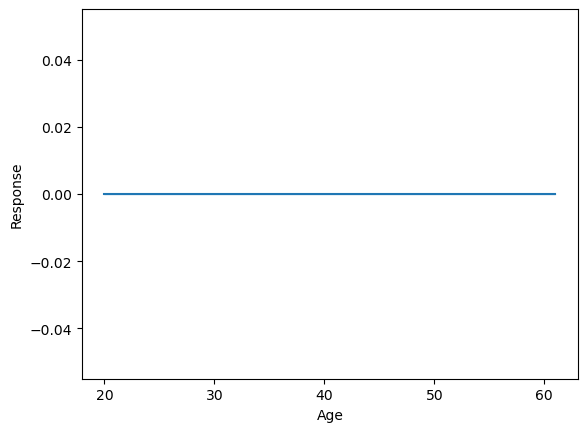

In [197]:
sns.lineplot(data = df1,x = 'Age',y = 'Response')

In [198]:
X = df1[['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']]
y = df['Response']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=1234)
from sklearn.linear_model import LogisticRegression
from math import sqrt

sqrt(df.shape[0])

clf1 = LogisticRegression()

clf1.fit(X_train,y_train)
pred3 = clf1.predict(X_test)
pred3
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report
print("The Accurancy Score:",accuracy_score(y_test,pred3))
print("The Precision Score",precision_score(y_test,pred3))
confusion_matrix(y_test,pred3)
classification_report(y_test,pred3)

The Accurancy Score: 0.8775320773529952


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Precision Score 0.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.88      1.00      0.93    267549\n           1       0.00      0.00      0.00     37339\n\n    accuracy                           0.88    304888\n   macro avg       0.44      0.50      0.47    304888\nweighted avg       0.77      0.88      0.82    304888\n'

In [199]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [200]:
X = df1[['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']]
y = df['Response']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.9,random_state=365,stratify=y)
from sklearn.tree import DecisionTreeClassifier
from math import sqrt

sqrt(df.shape[0])

dectree = DecisionTreeClassifier()

dectree.fit(X_train,y_train)
pred4 = dectree.predict(X_test)
pred4
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report
print("The Accurancy Score:",accuracy_score(y_test,pred4))
print("The Precision Score",precision_score(y_test,pred4))
confusion_matrix(y_test,pred4)
# classification_report(y_test,pred4)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.9,random_state=365,stratify=y)
from sklearn.tree import DecisionTreeClassifier
from math import sqrt

sqrt(df.shape[0])

dectree = DecisionTreeClassifier()

dectree.fit(X_train,y_train)
pred4 = dectree.predict(X_test)
pred4
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report
print("The Accurancy Score:",accuracy_score(y_test,pred4))
print("The Precision Score",precision_score(y_test,pred4))
confusion_matrix(y_test,pred4)
# classification_report(y_test,pred4)

The Accurancy Score: 0.8214426281126184
The Precision Score 0.28444444444444444
The Accurancy Score: 0.8209440843850857
The Precision Score 0.2823053589484328


array([[29891,  3549],
       [ 3275,  1396]], dtype=int64)

In [201]:
X = df1[['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']]
y = df['Response']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.9,random_state=1234)
from sklearn.ensemble import RandomForestClassifier
from math import sqrt

sqrt(df.shape[0])

RanForest = RandomForestClassifier(criterion="entropy",max_depth=5)

RanForest.fit(X_train,y_train)
pred5 = RanForest.predict(X_test)
pred5
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report
print("The Accurancy Score:",accuracy_score(y_test,pred5))
print("The Precision Score",precision_score(y_test,pred5))
confusion_matrix(y_test,pred5)
# classification_report(y_test,pred4)

The Accurancy Score: 0.876571068720317
The Precision Score 0.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[33407,     0],
       [ 4704,     0]], dtype=int64)

In [202]:
X = df1[['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']]
y = df['Response']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt

sqrt(df.shape[0])

clf = KNeighborsClassifier(n_neighbors=13)

clf.fit(X_train,y_train)
pred2 = clf.predict(X_test)
pred2
from sklearn.metrics import accuracy_score
print("The Accurancy Score(knn):",accuracy_score(y_test,pred2))
print("The Precision Score(knn):",precision_score(y_test,pred2))

The Accurancy Score(knn): 0.8748261656739524
The Precision Score(knn): 0.23529411764705882


In [203]:
dd = pd.DataFrame({'Actual': y_test , 'Predicted' : pred2 , 'date_diff' : y_test - pred2})
dd

,Actual,Predicted,date_diff
200222,0,0,0
49766,0,0,0
172201,0,0,0
160713,0,0,0
53272,0,0,0
...,...,...,...
258403,0,0,0
234155,0,0,0
24476,0,0,0
60423,0,0,0


200222    0
49766     0
172201    0
160713    0
53272     0
         ..
258403    0
234155    0
24476     0
60423     0
185839    0
Name: Response, Length: 76222, dtype: int64

In [208]:
df1['Response'].value_counts()

0.0    381109
Name: Response, dtype: int64